In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cardiographic.csv")

In [2]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
0,120,0.5,1,0.0,0.0,0.0,0.0,30,1.2,20,3.0
1,132,0.3,2,0.5,0.1,0.0,0.1,40,1.5,15,3.2
2,110,0.4,1,0.3,0.0,0.0,0.2,35,1.3,18,2.8
3,125,0.6,0,0.2,0.3,0.1,0.0,32,1.4,25,3.5
4,140,0.7,1,0.1,0.2,0.1,0.3,50,1.1,30,3.6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LB      10 non-null     int64  
 1   AC      10 non-null     float64
 2   FM      10 non-null     int64  
 3   UC      10 non-null     float64
 4   DL      10 non-null     float64
 5   DS      10 non-null     float64
 6   DP      10 non-null     float64
 7   ASTV    10 non-null     int64  
 8   MSTV    10 non-null     float64
 9   ALTV    10 non-null     int64  
 10  MLTV    10 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 1012.0 bytes


In [4]:
df.isnull().sum()

LB      0
AC      0
FM      0
UC      0
DL      0
DS      0
DP      0
ASTV    0
MSTV    0
ALTV    0
MLTV    0
dtype: int64

In [5]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,130.300000,0.510000,1.100000,0.250000,0.13000,0.060000,0.12000,41.000000,1.370000,24.400000,3.340000
std,10.252913,0.166333,0.737865,0.184089,0.11595,0.069921,0.10328,9.580072,0.188856,5.947922,0.320416
min,110.000000,0.300000,0.000000,0.000000,0.00000,0.000000,0.00000,30.000000,1.100000,15.000000,2.800000
25%,125.750000,0.400000,1.000000,0.125000,0.02500,0.000000,0.02500,33.500000,1.225000,20.500000,3.125000
50%,131.000000,0.500000,1.000000,0.250000,0.10000,0.050000,0.10000,38.500000,1.350000,24.500000,3.350000
75%,137.250000,0.600000,1.750000,0.375000,0.20000,0.100000,0.20000,47.250000,1.475000,27.750000,3.575000
max,145.000000,0.800000,2.000000,0.500000,0.30000,0.200000,0.30000,60.000000,1.700000,35.000000,3.800000


In [6]:
df.dtypes

LB        int64
AC      float64
FM        int64
UC      float64
DL      float64
DS      float64
DP      float64
ASTV      int64
MSTV    float64
ALTV      int64
MLTV    float64
dtype: object

In [8]:
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# stastical summary
df.mean()
df.median()
df.std()

LB      10.252913
AC       0.166333
FM       0.737865
UC       0.184089
DL       0.115950
DS       0.069921
DP       0.103280
ASTV     9.580072
MSTV     0.188856
ALTV     5.947922
MLTV     0.320416
dtype: float64

In [12]:
df.describe().T[['mean', '50%', 'std']]

,mean,50%,std
LB,130.30,131.00,10.252913
AC,0.51,0.50,0.166333
FM,1.10,1.00,0.737865
UC,0.25,0.25,0.184089
DL,0.13,0.10,0.115950
DS,0.06,0.05,0.069921
DP,0.12,0.10,0.103280
ASTV,41.00,38.50,9.580072
MSTV,1.37,1.35,0.188856
ALTV,24.40,24.50,5.947922


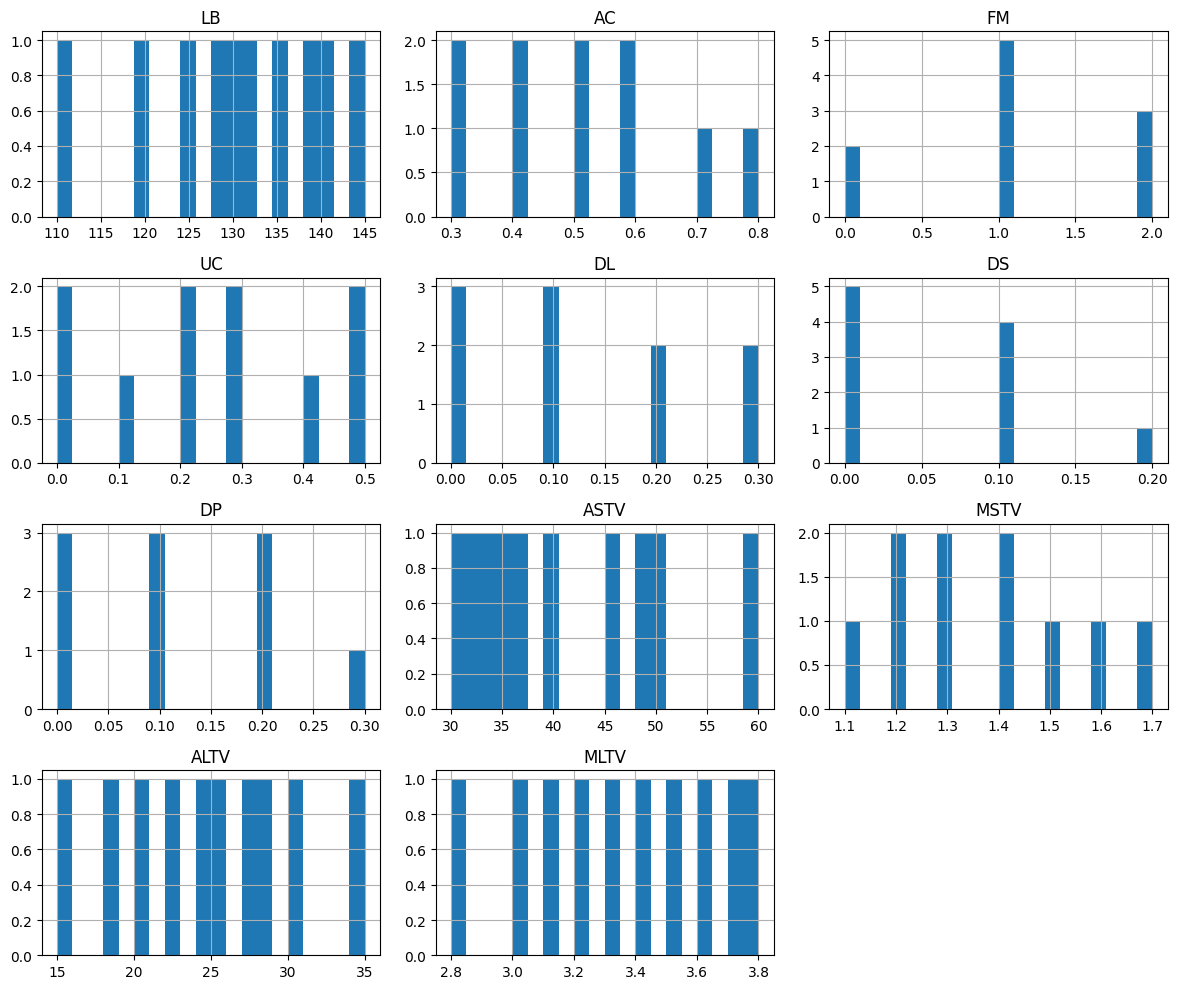

In [13]:
# data visulaization
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

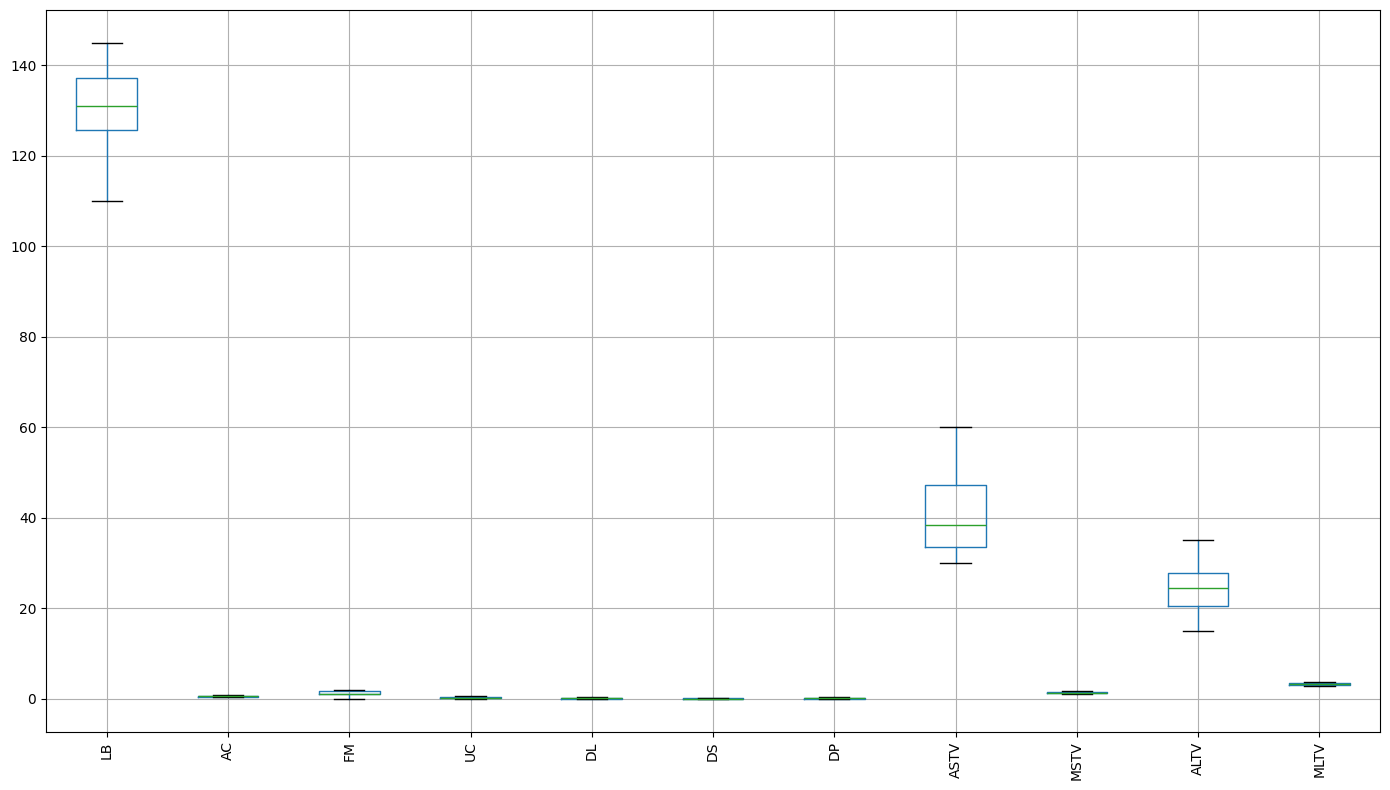

In [14]:
df.boxplot(figsize=(14, 8), rot=90)
plt.tight_layout()
plt.show()

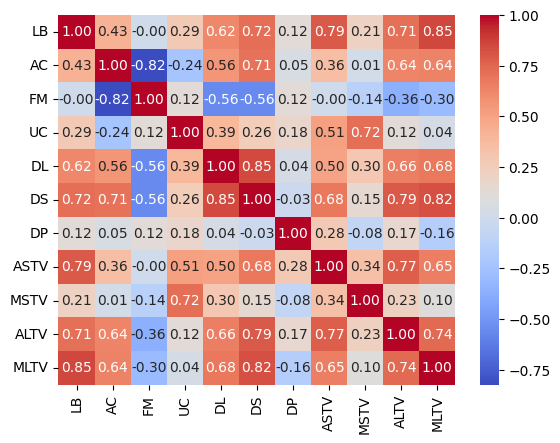

In [15]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

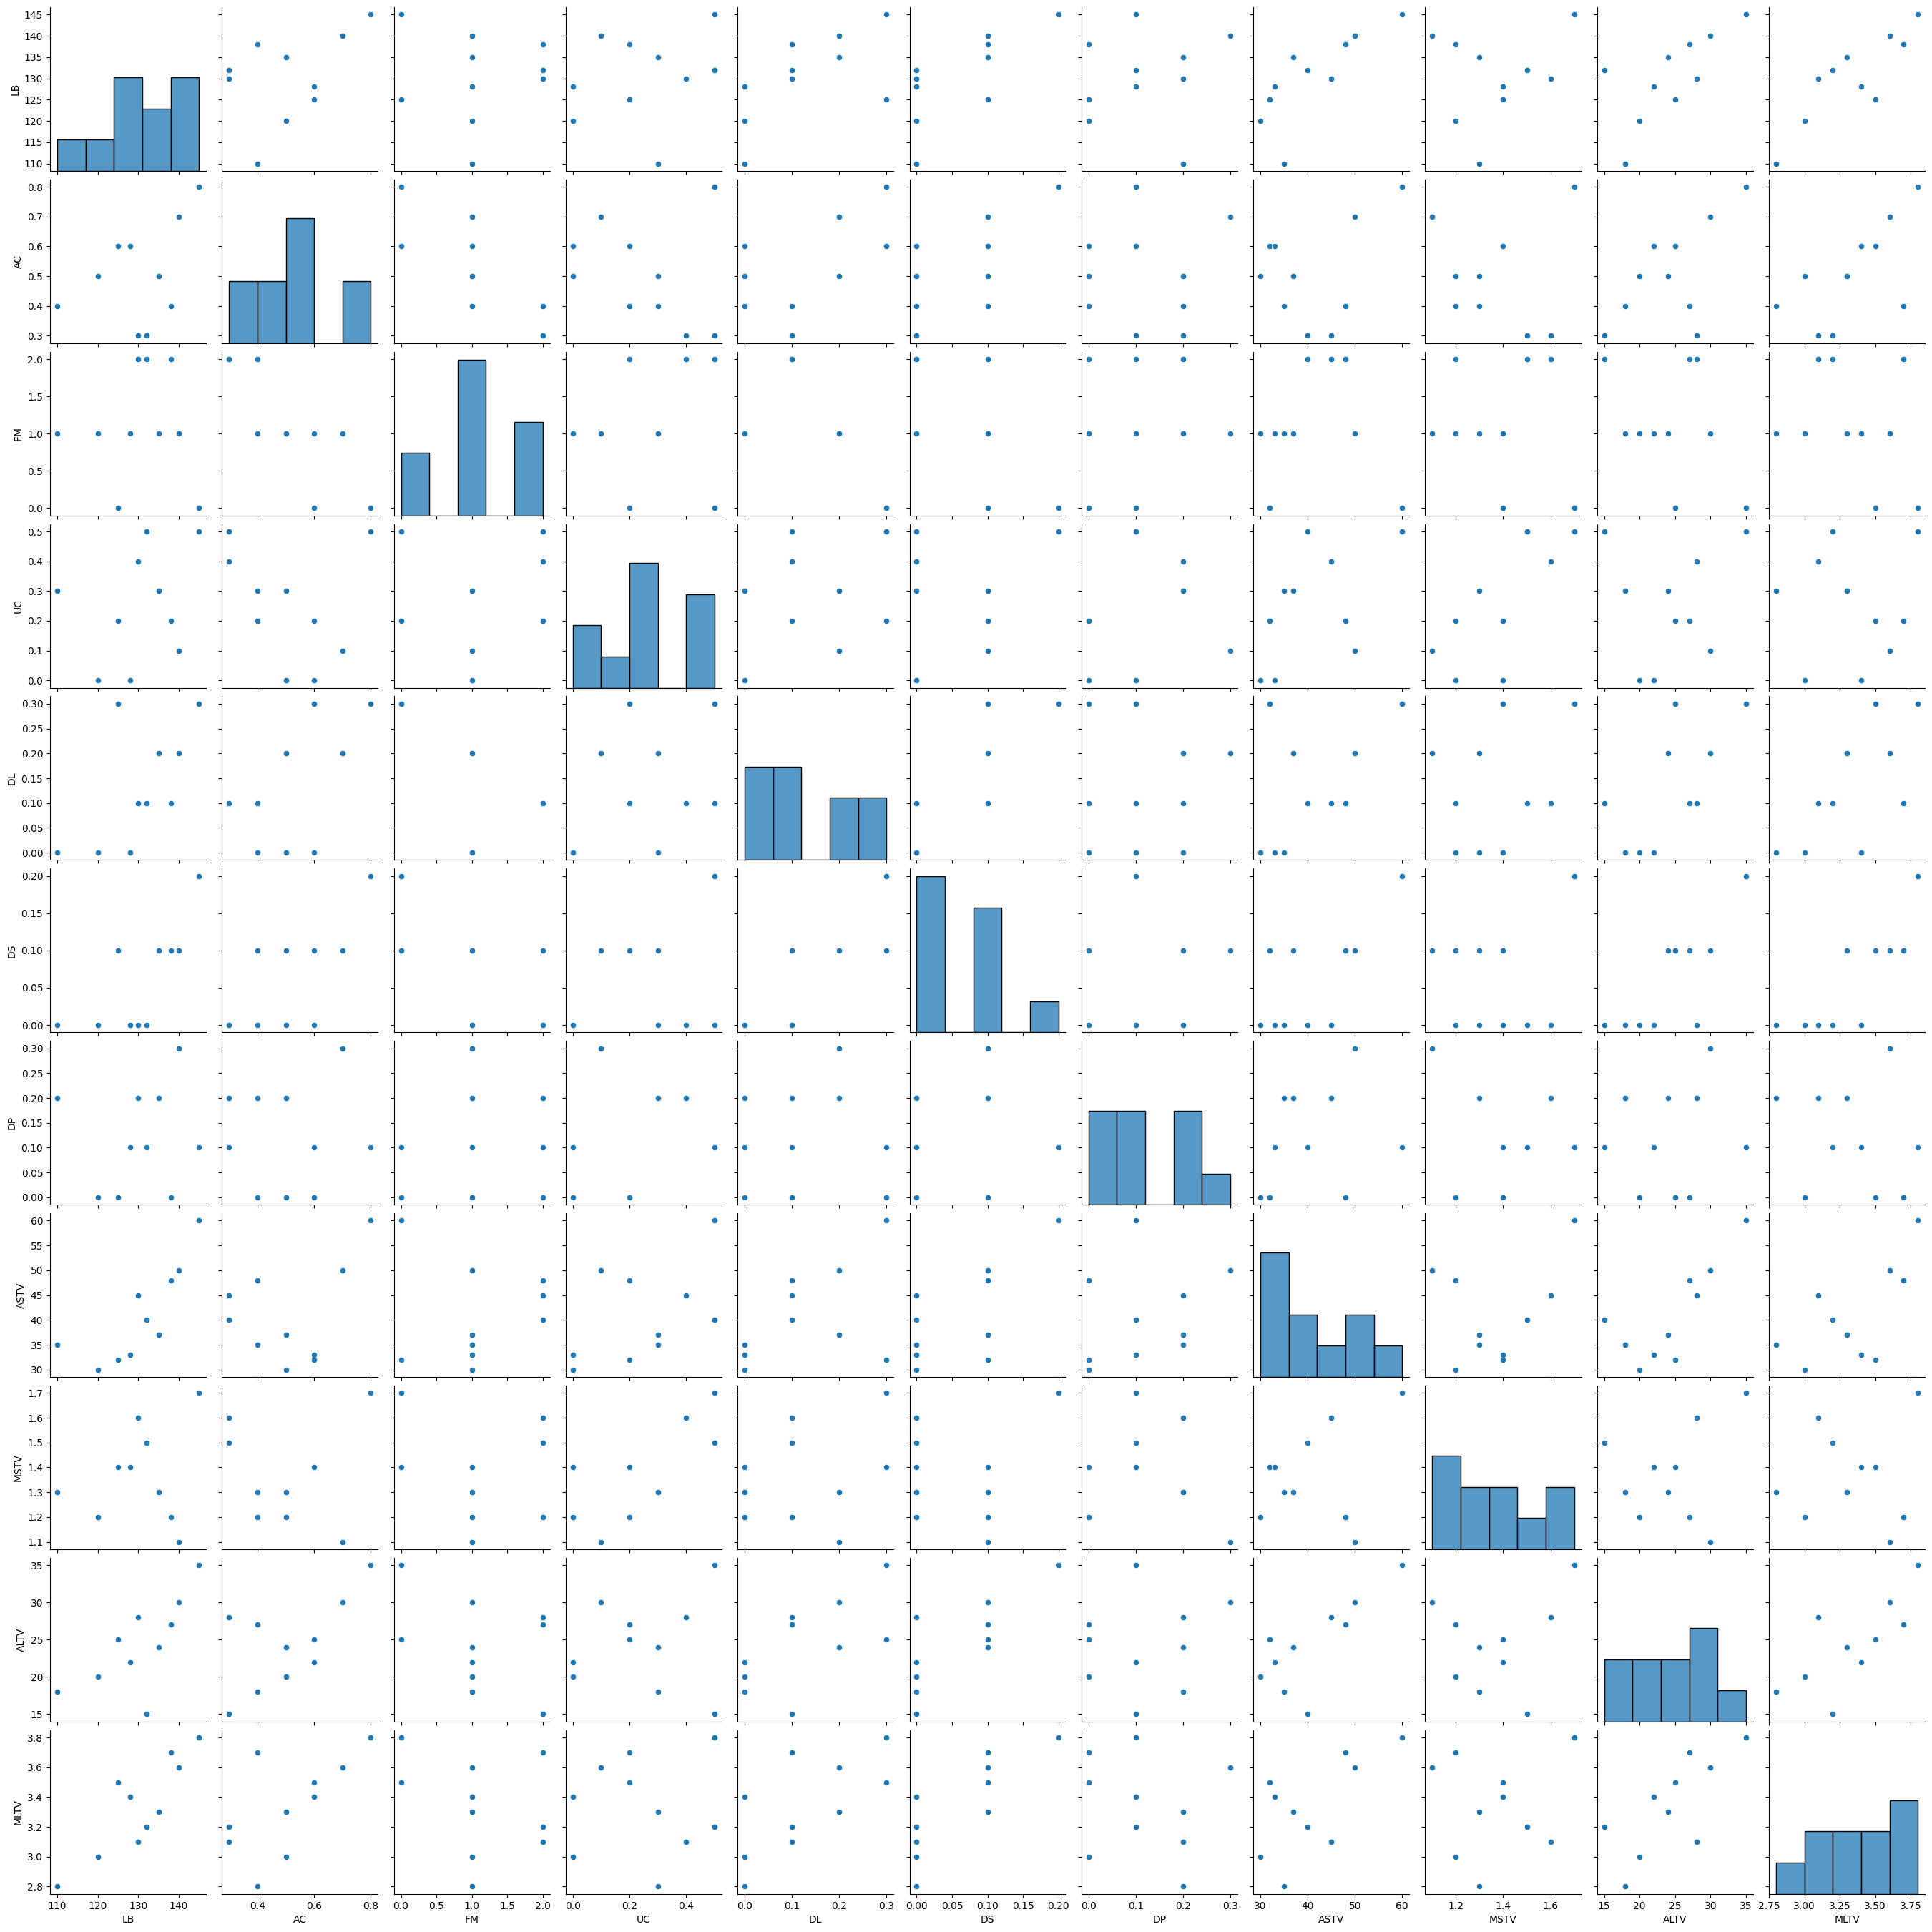

In [16]:
sns.pairplot(df)
plt.show()

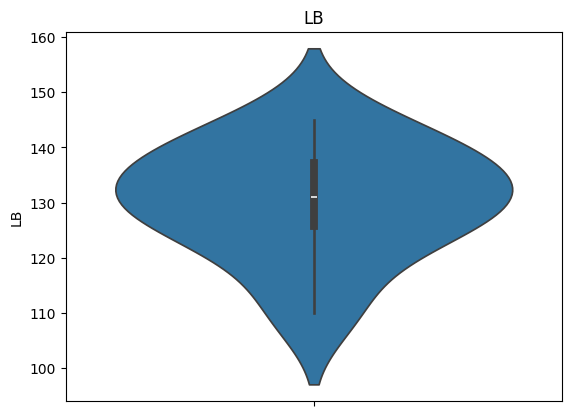

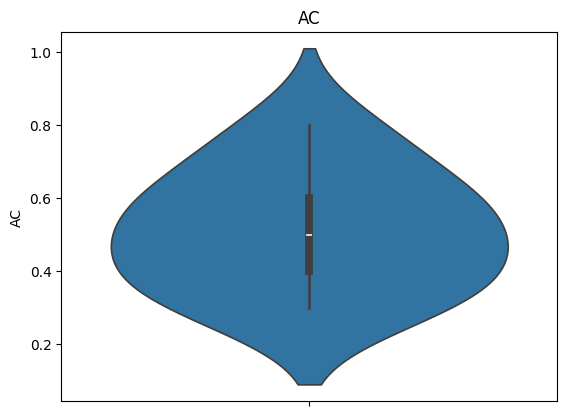

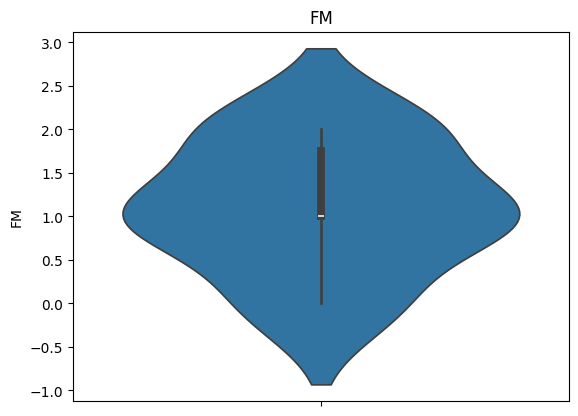

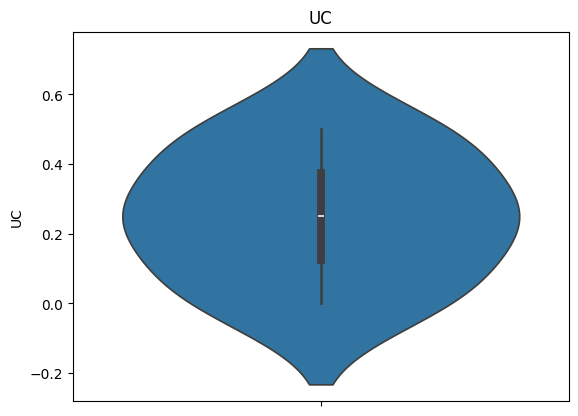

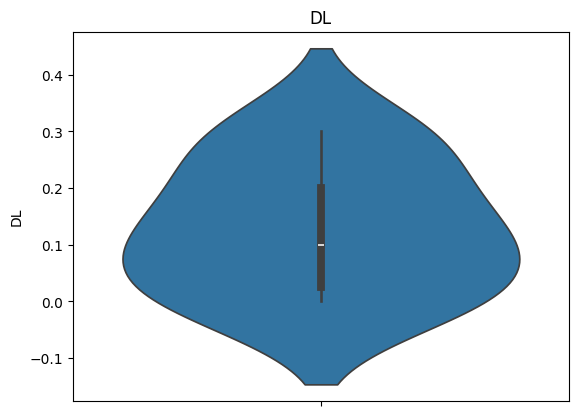

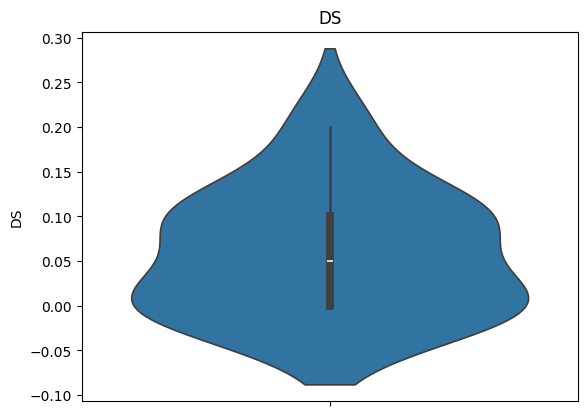

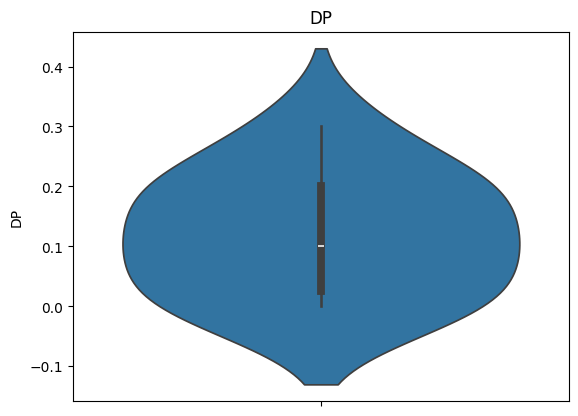

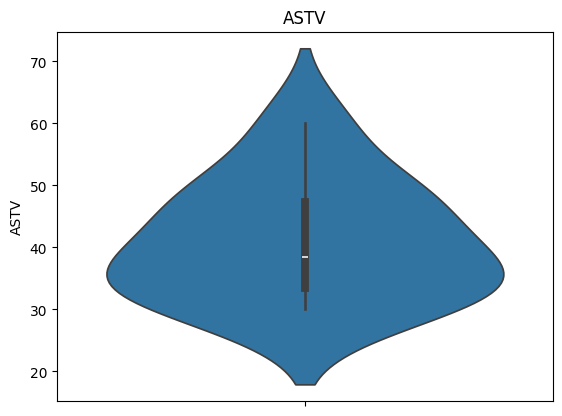

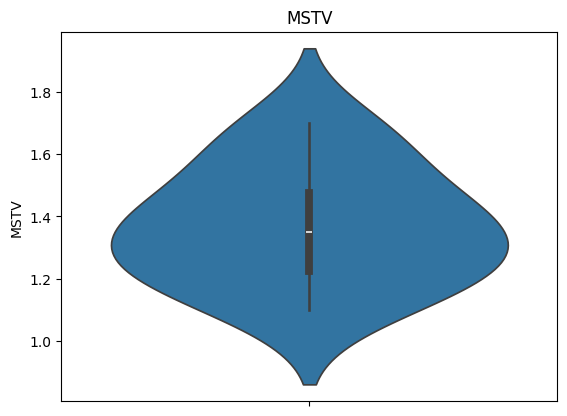

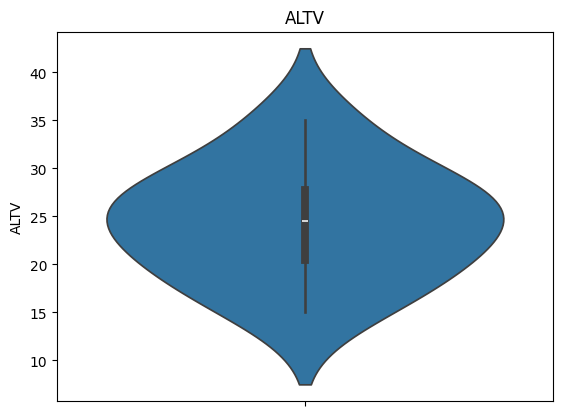

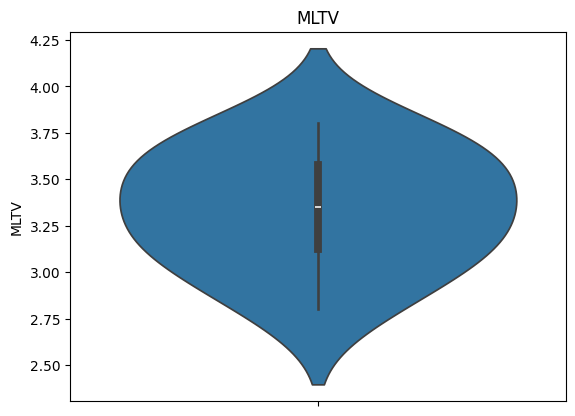

In [17]:
for col in df.columns:
    sns.violinplot(y=df[col])
    plt.title(col)
    plt.show()

In [18]:
# pattern recogonization
correlations = df.corr()
correlations

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV
LB,1.000000,0.428053,-4.406103e-03,0.285511,0.617789,0.716056,0.119619,7.918438e-01,0.211741,0.708388,0.851631
AC,0.428053,1.000000,-8.238415e-01,-0.235865,0.558830,0.706978,0.051743,3.556153e-01,0.010611,0.635668,0.637949
FM,-0.004406,-0.823842,1.000000e+00,0.122700,-0.558442,-0.559950,0.116642,-2.792172e-17,-0.135550,-0.364567,-0.300778
UC,0.285511,-0.235865,1.226996e-01,1.000000,0.390408,0.258967,0.175322,5.103229e-01,0.719085,0.121771,0.037674
DL,0.617789,0.558830,-5.584416e-01,0.390408,1.000000,0.849714,0.037113,5.001351e-01,0.299369,0.657326,0.681877
DS,0.716056,0.706978,-5.599496e-01,0.258967,0.849714,1.000000,-0.030773,6.800917e-01,0.151458,0.790822,0.823277
DP,0.119619,0.051743,1.166424e-01,0.175322,0.037113,-0.030773,1.000000,2.807465e-01,-0.079752,0.166405,-0.161165
ASTV,0.791844,0.355615,-2.792172e-17,0.510323,0.500135,0.680092,0.280747,1.000000e+00,0.337769,0.772180,0.651548
MSTV,0.211741,0.010611,-1.355496e-01,0.719085,0.299369,0.151458,-0.079752,3.377693e-01,1.000000,0.229482,0.095481
ALTV,0.708388,0.635668,-3.645675e-01,0.121771,0.657326,0.790822,0.166405,7.721801e-01,0.229482,1.000000,0.736927


In [19]:
correlations['LB'].sort_values(ascending=False)

LB      1.000000
MLTV    0.851631
ASTV    0.791844
DS      0.716056
ALTV    0.708388
DL      0.617789
AC      0.428053
UC      0.285511
MSTV    0.211741
DP      0.119619
FM     -0.004406
Name: LB, dtype: float64